## **Business objective-The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention Sample Data Set Details: Resumes and financial documents**

**Installing requried packages**

In [ ]:
!pip install python-doc
!python3 -m pip install docx2txt
!pip install textract
!sudo apt-get install antiword
!pip install python-docx
!pip install xgboost
!pip install wordcloud
!python -m spacy download en_core_web_sm
!pip install nltk
!pip3 install nltk
!pip install dtale

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.7/39.7 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 76.8 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 3.5.4
    Uninstalling Sphinx-3.5.4:
      Successfully uninstalled Sphinx-3.5.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3957 sha256=7c7f079bab62e4cfbb3745e92d22bf54ad0337444bd06ac4262865d37f87302c
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 5.8 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 118 kB of archives.
After this operation, 603 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 antiword amd64 0.37-16 [118 kB]
Fetched 118 kB in 0s (1,219 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package antiword.
(Reading database ... 123069 files and directories current

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing** **Libraries**

In [ ]:
import os,re
import docx2txt
import textract
from docx import Document
import nltk
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download("stopwords")
import xgboost as xgb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import time
import string
import dtale
import warnings
warnings.filterwarnings('ignore')
import spacy
from matplotlib.gridspec import GridSpec
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from sklearn.linear_model import SGDClassifier
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer
warnings.filterwarnings("ignore", category=DeprecationWarning)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package 

**Showing** **the** ***Resumes*** **which** **we** **have** **uploaded** **on** **MyDrive**

In [ ]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/Resumes')

['Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'Internship_Ravali_Musquare Technologies (1).docx',
 'React Developer_Haripriya.docx',
 'React Developer_Naveen sadhu.docx',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'React Developer_Pragnya.docx',
 'React Developer_Sarala Madasu-converted.docx',
 'Reactjs Developer_Ranga Gaganam_Musquare Technologies.docx',
 'Reactjs Developer_Prabakaran_Musquare Technologies.pdf',
 'Reactjs Developer_Pranish Sonone_Musquare Technologies.docx',
 'React Developer_Vinay Reddy.doc',
 'React Developer_Kamalakar Reddy.docx',
 'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh.docx',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React Developer_Deepakreddy.docx',
 'React Developer_PavasGoswami.doc',
 'React Dev_Krishna Kanth.docx',
 'Reactjs Developer_Shaik Abdu

**Creating** **Empty** **Sets**

In [ ]:
file_path = []
category = []

**Appending all "React JS Developer Resumes"**

In [ ]:
directory = '/content/drive/MyDrive/Colab Notebooks/Resumes'
for i in os.listdir(directory):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory, i)
    file_path.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
    category.append('React JS Developer Resume')

In [ ]:
file_path, category

(['MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n     \n\n⇨ Currently working in PickupBiz Solution Private Limited, Pune from January 2021 to till date \n\n⇨ 9 Months of working as an Intern on UI React JS - Software Developer \n\n⇨ Having sound experience and exposure on UI development using React JS, Bootstrap, HTML 5, CSS, React Hooks, and Redux etc. \n\n⇨ Ability to work under any given environment \n\n⇨ Demonstrated good communication and Analytical skills \n\n⇨ Team building skills, emphasizing versatility and adaptability \n\n⇨ Dedication and drive as a hard-working individual \n\n⇨ Ability to manage multiple tasks in a pressured environment \n\n                                                                           \n\nApplication Development & UI Designing – \n\n Coordinated with the development team of 10 to discuss user interface ideas and applications. - Reviewed application requirements and interface designs to ensure compatibility with existing applications.  \n\n \n\nUI

In [ ]:
file_path_1 = []
category_1 = []

**Appending All "Peoplesoft Resumes"**

In [ ]:
directory_1 = '/content/drive/MyDrive/Colab Notebooks/Resumes/Peoplesoft resumes'
for i in os.listdir(directory_1):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_1, i)
    file_path_1.append((textract.process(os.path.join(directory_1, i))).decode('utf-8'))
    category_1.append('PeopleSoft Resumes')

In [ ]:
file_path_1,category_1

(['\n                      PeopleSoft Database Administrator\n\n\nGangareddy\n\n\n\nPROFESSIONAL OBJECTIVE:\n\n             To work in a professional and challenging  environment,  while\nbest utilizing my   talent and keeping abreast with  the  latest  technical\nadvancement in the field of PeopleSoft Application  DBA,  by  which  I  can\nderive utmost job satisfaction and knowledge of the field and to  become  a\nsuccessful in Oracle PeopleSoft Application DBA activities.\n\nPROFESSIONAL SUMMARY:\n\n    •  Having   4+   years  of  experience  as  an  PeopleSoft  Applications\n      ADMIN/DBA\n    • Experience in Creating and Configuring Application Server Domains.\n    • Created multiple Server domains on separate host systems to access one\n      database, an effective strategy for performance and tuning.\n    • Experience in Application Server Administration.\n    • Ensured system availability  by  implementing  failover  by  spreading\n      multiple domains across\n      Multiple

In [ ]:
file_path_2 = []
category_2 = []

**Appending All "SQL Developer Lightning Insight Resumes"**

In [ ]:
directory_2 = '/content/drive/MyDrive/Colab Notebooks/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory_2):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_2, i)
    file_path_2.append((textract.process(os.path.join(directory_2, i))).decode('utf-8'))
    category_2.append('SQL Developer Lightning Insight Resumes')

In [ ]:
file_path_2,category_2

(['ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Developer   \n\n\n\n\t\t\n\n\n\nSummary\n\n\n\n2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.\n\nExpertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.\n\nHandled data manipulation and data consistency by creating Views, Triggers, and Synonyms.\n\nHands on experience in creation, optimization and debugging Stored Procedure and Functions.\n\nFamiliar in writing queries using CTE, Temporary Tables and Table Variables.\n\nGood experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.\n\nExperience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.\n\nWorked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services.\n\nUsed 

In [ ]:
file_path_3 = []
category_3 = []

**Appending All "Workday Resumes"**

In [ ]:
directory_3 = '/content/drive/MyDrive/Colab Notebooks/Resumes/workday resumes'
for i in os.listdir(directory_3):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_3, i)
    file_path_3.append((textract.process(os.path.join(directory_3, i))).decode('utf-8'))
    category_3.append('Workday Resumes')

In [ ]:
file_path_3, category_3

(['JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMMARY\n\nPROFESSIONAL SUMMARY\n\n\n\n\n\n\t\t3 years of Experience in Workday as Functional HCM Consultant.\n\n\t\tGood exposure in working on business improvements and process activities.\n\n\t\tExceptional ability in understanding the business needs and improving the process.\n\n\t\tExcellent communication skills and proven experience in working independently as well as in a team.\n\n\t\tInvolved in preparing business requirement documents and analysis of client functional requirements.\n\n\t\tExtensive knowledge on Complete Tenant configurations – (Supervisory Organizations, Roles, Business Processes)\n\n\tExperience in performing HCM tasks like defining Job Profiles, position creations, employee hiring, transfers, promotions, demotions and terminations etc., as part of Workday Testing requirements.\n\n\tConfiguration of Supervisory Organizations, Business Process.\n\n\tExperience working on Workday HCM Global roll out and Support proje

**Storeing Data in a "dataset" Variable Containing files under File_path (Resume Titles)**

In [ ]:
dataset = pd.DataFrame(data = file_path , columns = ['Resumes'])
dataset['category'] = category
dataset

,Resumes,category
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume
6,\n CURRICULUM VIT...,React JS Developer Resume
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume
9,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume


**Storing second category data into dataset_1**

In [ ]:
dataset_1 = pd.DataFrame(data = file_path_1 , columns = ['Resumes'])
dataset_1['category_1'] = category_1
dataset_1

,Resumes,category_1
0,\n PeopleSoft Database Ad...,PeopleSoft Resumes
1,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft Resumes
2,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft Resumes
3,\nRahul Ahuja\n-------------------------------...,PeopleSoft Resumes
4,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft Resumes
5,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",PeopleSoft Resumes
6,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft Resumes
7,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft Resumes
8,\n PeopleSoft Admin/Peo...,PeopleSoft Resumes
9,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft Resumes


In [ ]:
dataset_2 = pd.DataFrame(data = file_path_2 , columns = ['Resumes'])
dataset_2['category_2'] = category_2
dataset_2

,Resumes,category_2
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning Insight Resumes
1,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer Lightning Insight Resumes
2,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer Lightning Insight Resumes
3,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer Lightning Insight Resumes
4,KAMBALLA PRADEEP ...,SQL Developer Lightning Insight Resumes
5,\n SQL S...,SQL Developer Lightning Insight Resumes
6,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer Lightning Insight Resumes
7,BUDDHA VAMSI ...,SQL Developer Lightning Insight Resumes
8,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer Lightning Insight Resumes
9,\n\n\n\n\n “ Hyderabad\nNazeer Basha\n SQL and...,SQL Developer Lightning Insight Resumes


In [ ]:
dataset_3 = pd.DataFrame(data = file_path_3 , columns = ['Resumes'])
dataset_3['category_3'] = category_3
dataset_3

,Resumes,category_3
0,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday Resumes
1,\n Hari Krishna ...,Workday Resumes
2,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday Resumes
3,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday Resumes
4,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,Workday Resumes
5,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resumes
6,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,Workday Resumes
7,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday Resumes
8,\nName : Naresh Babu Cherukuri\n\n\nObjective...,Workday Resumes
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday Resumes


**Combining the all dataset into one dataset**

In [ ]:
data = dataset.append([dataset_1, dataset_2, dataset_3], ignore_index = True)
data

,Resumes,category,category_1,category_2,category_3
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,NaN,NaN,NaN
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN
4,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,NaN,NaN,NaN
...,...,...,...,...,...
74,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,NaN,NaN,NaN,Workday Resumes
75,\n Workday Integration Consultant\n\nName...,NaN,NaN,NaN,Workday Resumes
76,Vinay kumar .v\nWorkday Functional Consultant\...,NaN,NaN,NaN,Workday Resumes
77,\nVenkateswarlu.B ...,NaN,NaN,NaN,Workday Resumes


In [ ]:
data['Category'] = category + category_1 + category_2 + category_3
data

,Resumes,category,category_1,category_2,category_3,Category
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
74,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,NaN,NaN,NaN,Workday Resumes,Workday Resumes
75,\n Workday Integration Consultant\n\nName...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
76,Vinay kumar .v\nWorkday Functional Consultant\...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
77,\nVenkateswarlu.B ...,NaN,NaN,NaN,Workday Resumes,Workday Resumes


**Displying all the resumes**

In [ ]:
data.iloc[:,0]

0     MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...
1     SUSOVAN  BAG   \n\nSeeking  a  challenging  po...
2     Name: Ravali P \n\n\n\n                       ...
3     HARIPRIYA BATTINA \n\nExperience as UI Develop...
4     Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
                            ...                        
74    \nHarikrishna Akula\n\n\n\n Summary:\n    ❖ 5....
75    \n      Workday Integration Consultant\n\nName...
76    Vinay kumar .v\nWorkday Functional Consultant\...
77    \nVenkateswarlu.B                             ...
78    Workday HCM  Techno functional Consultant     ...
Name: Resumes, Length: 79, dtype: object

In [ ]:
data

,Resumes,category,category_1,category_2,category_3,Category
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
74,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,NaN,NaN,NaN,Workday Resumes,Workday Resumes
75,\n Workday Integration Consultant\n\nName...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
76,Vinay kumar .v\nWorkday Functional Consultant\...,NaN,NaN,NaN,Workday Resumes,Workday Resumes
77,\nVenkateswarlu.B ...,NaN,NaN,NaN,Workday Resumes,Workday Resumes


**Removing all NA values and converting in a single dataset**

In [ ]:
data=data.iloc[:,[0,5]]

In [ ]:
#final dataset
data

,Resumes,Category
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
...,...,...
74,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,Workday Resumes
75,\n Workday Integration Consultant\n\nName...,Workday Resumes
76,Vinay kumar .v\nWorkday Functional Consultant\...,Workday Resumes
77,\nVenkateswarlu.B ...,Workday Resumes


## **Exploratory Data Analysis**

In [ ]:
# Assigning a reference to a running D-Tale process
dt = dtale.show(data)
dt

http://8450e726e9ee:40000/dtale/main/1

In [ ]:
#Showing first five records
data.head()

,Resumes,Category
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume


In [ ]:
#showing last five records
data.tail()

,Resumes,Category
74,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,Workday Resumes
75,\n Workday Integration Consultant\n\nName...,Workday Resumes
76,Vinay kumar .v\nWorkday Functional Consultant\...,Workday Resumes
77,\nVenkateswarlu.B ...,Workday Resumes
78,Workday HCM Techno functional Consultant ...,Workday Resumes


In [ ]:
# View dimensions of dataset
data.shape

(79, 2)

In [ ]:
# View summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [ ]:
# checking missing values in variables
data.isnull().any()

Resumes     False
Category    False
dtype: bool

In [ ]:
# Checking for duplicated values
data.duplicated().sum()

0

In [ ]:
# Checking mathematical calculations
data.describe()

,Resumes,Category
count,79,79
unique,79,4
top,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
freq,1,24


In [ ]:
# Find unique values of a column
print(data['Category'].unique())

['React JS Developer Resume' 'PeopleSoft Resumes'
 'SQL Developer Lightning Insight Resumes' 'Workday Resumes']


In [ ]:
data['Category'].value_counts()

React JS Developer Resume                  24
Workday Resumes                            21
PeopleSoft Resumes                         20
SQL Developer Lightning Insight Resumes    14
Name: Category, dtype: int64

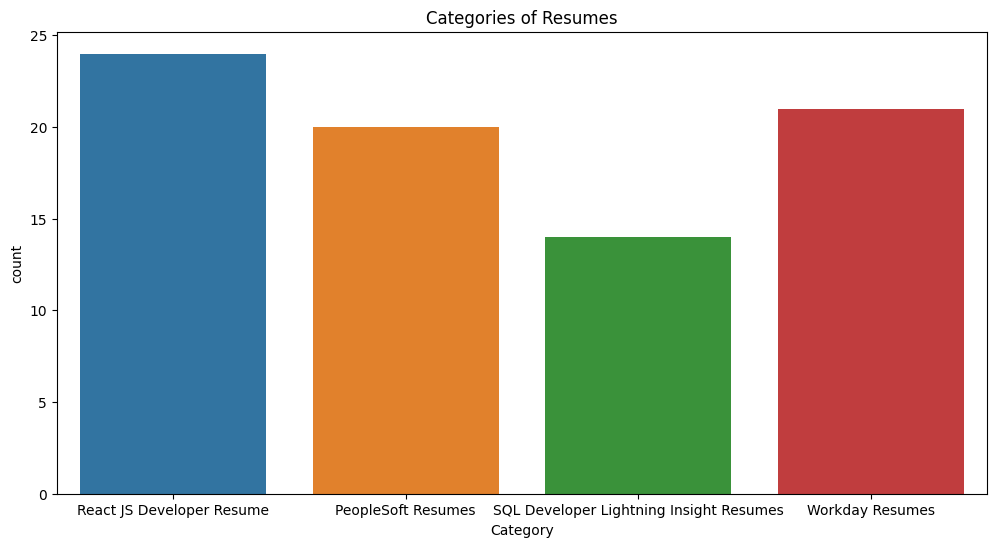

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Category',data=data)
plt.title('Categories of Resumes')
plt.show()

**we can see that the React Js resumes has high count and the sql developer has less resume count**

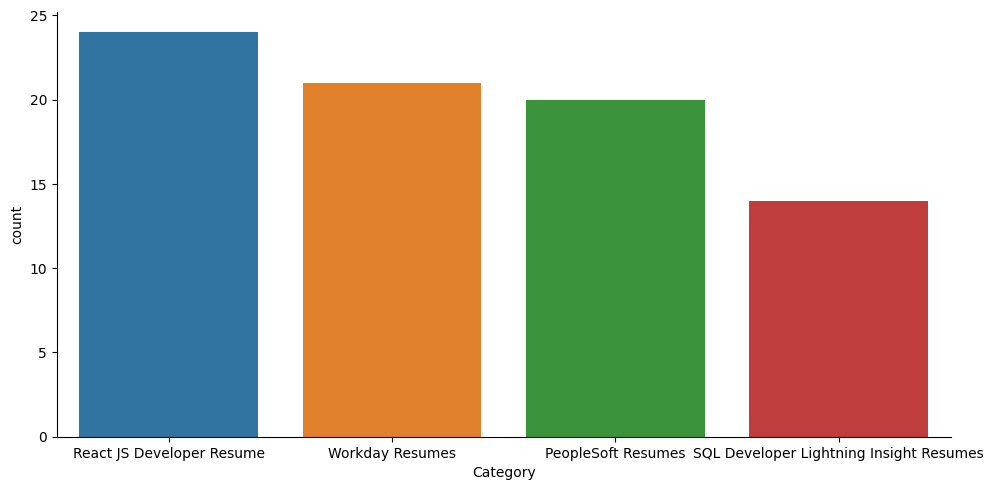

In [ ]:
# Create catplot chart
sns.catplot(x='Category', kind="count", aspect = 2, data=data, order = data['Category'].value_counts().index)

In [ ]:
data.Category.unique()

array(['React JS Developer Resume', 'PeopleSoft Resumes',
       'SQL Developer Lightning Insight Resumes', 'Workday Resumes'],
      dtype=object)

In [ ]:
# compute the percentage of Resumes in each category
React_JS_Developer_Resumes = len(data[data['Category'] == 'React JS Developer Resume']) / len(data) * 100
Peoplesoft_Resumes = len(data[data['Category'] == 'PeopleSoft Resumes']) / len(data) * 100
SQL_Developer_Resumes = len(data[data['Category'] == 'SQL Developer Lightning Insight Resumes']) / len(data) * 100
Workday_Resumes = len(data[data['Category'] == 'Workday Resumes']) / len(data) * 100

# print the results
print('React JS Developer Resumes: {:.2f}%'.format(React_JS_Developer_Resumes))
print('Peoplesoft Resumes: {:.2f}%'.format(Peoplesoft_Resumes))
print('SQL Developer Resumes: {:.2f}%'.format(SQL_Developer_Resumes))
print('Workday Resumes: {:.2f}%'.format(Workday_Resumes))

React JS Developer Resumes: 30.38%
Peoplesoft Resumes: 25.32%
SQL Developer Resumes: 17.72%
Workday Resumes: 26.58%


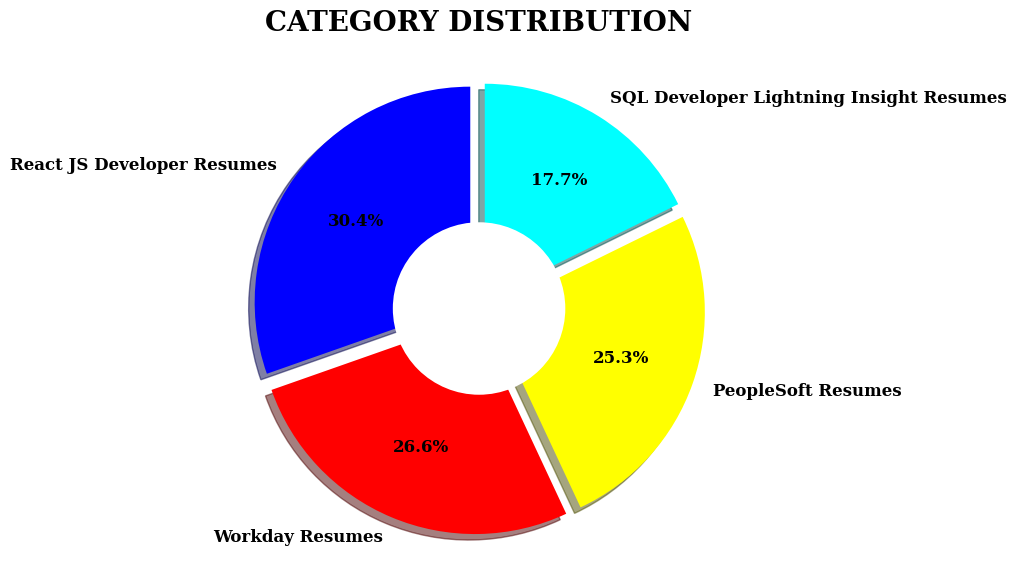

In [ ]:
label_data= data['Category'].value_counts()
labels_name = ['React JS Developer Resumes','Workday Resumes','PeopleSoft Resumes','SQL Developer Lightning Insight Resumes',]
explode=(0.05,0.05,0.05,0.05)
plt.figure(figsize=(12,7))
patches, texts, pcts= plt.pie(label_data, labels= labels_name, colors=['blue','red','yellow','cyan'], pctdistance=0.65,shadow=True,
                             startangle=90, explode=explode, autopct='%1.1f%%',
                             textprops={'fontsize':12,'color':'black','weight':'bold','family':'serif'})
plt.setp(pcts,color='black')
hfont={'weight':'bold','family':'serif'}
plt.title('CATEGORY DISTRIBUTION',size=20,**hfont)

centre_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [ ]:
#Converting DataFrame into csv file for the further process
data.to_csv('Resumes.csv', index = False)

In [ ]:
#Importing dataset using pandas
resume_df = pd.read_csv('Resumes.csv')

In [ ]:
resume_df

,Resumes,Category
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
4,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
...,...,...
74,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,Workday Resumes
75,\n Workday Integration Consultant\n\nName...,Workday Resumes
76,Vinay kumar .v\nWorkday Functional Consultant\...,Workday Resumes
77,\nVenkateswarlu.B ...,Workday Resumes


**Applying Text Processing on DataFrame**

In [ ]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

**Converting Into Clean Resumes**

In [ ]:
resume_df['Clean_Resumes'] = np.vectorize(remove_pattern)(resume_df['Resumes'], "@[\w]*")
resume_df.head(10)

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG \n\nSeeking a challenging po...
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P \n\n\n\n ...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA \n\nExperience as UI Develop...
4,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,Venkatalakshmi Pedireddy\n\nSoftware Developer...
6,\n CURRICULUM VIT...,React JS Developer Resume,\n CURRICULUM VIT...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge..."
9,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...


**Removing URL from Clean_Resumes**

In [ ]:
clean_Resumes = []

for index, row in resume_df.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Resumes.split() if 'http' not in word]
    clean_Resumes.append(' '.join(words_without_links))

resume_df['Clean_Resumes'] = clean_Resumes
resume_df.head(10)

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
4,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,Venkatalakshmi Pedireddy Software Developer Ex...
6,\n CURRICULUM VIT...,React JS Developer Resume,CURRICULUM VITAE |Anjani Priyadarshini |Object...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU SARALA MADASU  204,Sri geethika..."
9,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,Ranga Gaganam Professional Summary: Profession...


**Removing '!' from Clean_Resumes**

In [ ]:
resume_df = resume_df[resume_df['Clean_Resumes']!='']
resume_df.head(10)

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
4,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,Venkatalakshmi Pedireddy Software Developer Ex...
6,\n CURRICULUM VIT...,React JS Developer Resume,CURRICULUM VITAE |Anjani Priyadarshini |Object...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,"SARALA MADASU SARALA MADASU  204,Sri geethika..."
9,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,Ranga Gaganam Professional Summary: Profession...


**Cleaning words from text**

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('!', '',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('⇨', '',text)
    text = re.sub(':', '',text)
    text = re.sub('•', '',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
resume_df['Clean_Resumes'] = resume_df['Clean_Resumes'].apply(lambda x: clean_text(x))
resume_df.head(10)

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...
4,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,venkatalakshmi pedireddy software developer ex...
6,\n CURRICULUM VIT...,React JS Developer Resume,curriculum vitae anjani priyadarshini objectiv...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,sarala madasu sarala madasu  geethika presti...
9,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,ranga gaganam professional summary professiona...


**Function to remove emoji**

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
resume_df['Clean_Resumes']=resume_df['Clean_Resumes'].apply(lambda x: remove_emoji(x))
resume_df.head(10)

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...
4,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,venkatalakshmi pedireddy software developer ex...
6,\n CURRICULUM VIT...,React JS Developer Resume,curriculum vitae anjani priyadarshini objectiv...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,sarala madasu sarala madasu geethika prestig...
9,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,ranga gaganam professional summary professiona...


**Applying Tokenization Clean_Resumes**

In [ ]:
resume_df['Tokenized_Resumes'] = resume_df['Clean_Resumes'].apply(lambda x: nltk.word_tokenize(x))
resume_df.head(10)

,Resumes,Category,Clean_Resumes,Tokenized_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...,"[md, khizaruddin, rauf, experience, currently,..."
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,"[susovan, bag, seeking, a, challenging, positi..."
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...,"[name, ravali, p, curriculum, vitae, specializ..."
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...,"[haripriya, battina, experience, as, ui, devel..."
4,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...,"[naveen, sadhu, title, software, developer, lo..."
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,venkatalakshmi pedireddy software developer ex...,"[venkatalakshmi, pedireddy, software, develope..."
6,\n CURRICULUM VIT...,React JS Developer Resume,curriculum vitae anjani priyadarshini objectiv...,"[curriculum, vitae, anjani, priyadarshini, obj..."
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...,"[pragnya, pattnaik, expertise, having, around,..."
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,sarala madasu sarala madasu geethika prestig...,"[sarala, madasu, sarala, madasu, geethika, pre..."
9,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,ranga gaganam professional summary professiona...,"[ranga, gaganam, professional, summary, profes..."


**Removing stop words from Clean_Resumes and Making new column Tidy_Resumes**

In [ ]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

cleaned_resumes = []

for index, row in resume_df.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Resumes.split()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_resumes.append(' '.join(words_without_stopwords))

resume_df['Tidy_Resumes'] = cleaned_resumes
resume_df.head(10)

,Resumes,Category,Clean_Resumes,Tokenized_Resumes,Tidy_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...,"[md, khizaruddin, rauf, experience, currently,...",md khizaruddin rauf experience currently worki...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,"[susovan, bag, seeking, a, challenging, positi...",susovan bag seeking a challenging position in ...
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...,"[name, ravali, p, curriculum, vitae, specializ...",name ravali p curriculum vitae specialization ...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...,"[haripriya, battina, experience, as, ui, devel...",haripriya battina experience as ui developer i...
4,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...,"[naveen, sadhu, title, software, developer, lo...",naveen sadhu title software developer location...
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,venkatalakshmi pedireddy software developer ex...,"[venkatalakshmi, pedireddy, software, develope...",venkatalakshmi pedireddy software developer ex...
6,\n CURRICULUM VIT...,React JS Developer Resume,curriculum vitae anjani priyadarshini objectiv...,"[curriculum, vitae, anjani, priyadarshini, obj...",curriculum vitae anjani priyadarshini objectiv...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...,"[pragnya, pattnaik, expertise, having, around,...",pragnya pattnaik expertise having around years...
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume,sarala madasu sarala madasu geethika prestig...,"[sarala, madasu, sarala, madasu, geethika, pre...",sarala madasu sarala madasu geethika prestiger...
9,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer Resume,ranga gaganam professional summary professiona...,"[ranga, gaganam, professional, summary, profes...",ranga gaganam professional summary professiona...


In [ ]:
Tokenized_Resume = resume_df['Tidy_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head(10)

0    [md, khizaruddin, rauf, experience, currently,...
1    [susovan, bag, seeking, a, challenging, positi...
2    [name, ravali, p, curriculum, vitae, specializ...
3    [haripriya, battina, experience, as, ui, devel...
4    [naveen, sadhu, title, software, developer, lo...
5    [venkatalakshmi, pedireddy, software, develope...
6    [curriculum, vitae, anjani, priyadarshini, obj...
7    [pragnya, pattnaik, expertise, having, around,...
8    [sarala, madasu, sarala, madasu, geethika, pre...
9    [ranga, gaganam, professional, summary, profes...
Name: Tidy_Resumes, dtype: object

In [ ]:
#remving un-necessary columns
resume_df.drop(['Resumes','Clean_Resumes','Tokenized_Resumes'],axis=1,inplace=True)
resume_df

,Category,Tidy_Resumes
0,React JS Developer Resume,md khizaruddin rauf experience currently worki...
1,React JS Developer Resume,susovan bag seeking a challenging position in ...
2,React JS Developer Resume,name ravali p curriculum vitae specialization ...
3,React JS Developer Resume,haripriya battina experience as ui developer i...
4,React JS Developer Resume,naveen sadhu title software developer location...
...,...,...
74,Workday Resumes,harikrishna akula summary years of it experien...
75,Workday Resumes,workday integration consultant name sri krishn...
76,Workday Resumes,vinay kumar v workday functional consultant ex...
77,Workday Resumes,venkateswarlub workday consultant having years...


In [ ]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_df['Tidy_Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
mostcommon

[('experience', 597),
 ('peoplesoft', 443),
 ('workday', 427),
 ('application', 417),
 ('using', 395),
 ('server', 350),
 ('data', 332),
 ('reports', 322),
 ('project', 305),
 ('business', 269),
 ('web', 241),
 ('database', 238),
 ('sql', 237),
 ('process', 233),
 ('worked', 219),
 ('knowledge', 210),
 ('client', 192),
 ('system', 190),
 ('involved', 189),
 ('tools', 189),
 ('integrations', 187),
 ('integration', 181),
 ('like', 180),
 ('support', 175),
 ('hcm', 173),
 ('skills', 170),
 ('good', 169),
 ('development', 163),
 ('team', 163),
 ('creating', 163),
 ('working', 161),
 ('people', 160),
 ('technical', 157),
 ('design', 152),
 ('services', 151),
 ('servers', 151),
 ('testing', 150),
 ('report', 150),
 ('various', 146),
 ('created', 146),
 ('role', 139),
 ('environment', 138),
 ('developer', 136),
 ('responsibilities', 134),
 ('security', 133),
 ('oracle', 133),
 ('management', 132),
 ('production', 130),
 ('issues', 129),
 ('studio', 127),
 ('eib', 127),
 ('’', 125),
 ('work', 

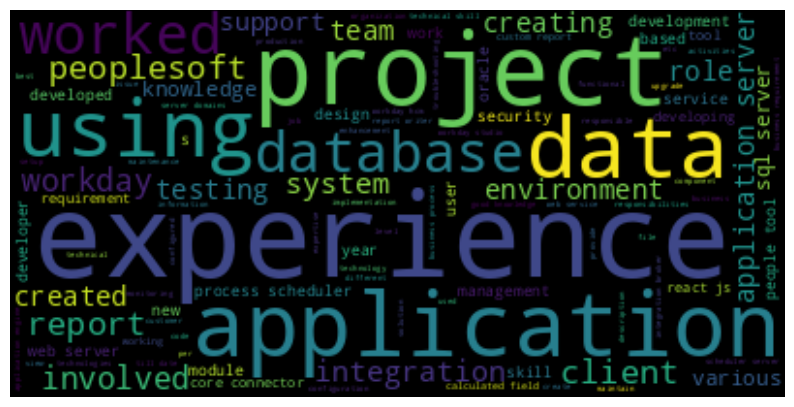

In [ ]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
categories = np.sort(resume_df['Category'].unique())
categories

array(['PeopleSoft Resumes', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resumes', 'Workday Resumes'],
      dtype=object)

In [ ]:
df_categories = [resume_df[resume_df['Category'] == category].loc[:, ['Tidy_Resumes', 'Category']] for category in categories]
df_categories

[                                         Tidy_Resumes            Category
 24  peoplesoft database administrator gangareddy p...  PeopleSoft Resumes
 25  sirazuddin m bangalore india sirazuddin m bang...  PeopleSoft Resumes
 26  peoplesoft admin varkala vikas career objectiv...  PeopleSoft Resumes
 27  rahul ahuja summary years of experience in peo...  PeopleSoft Resumes
 28  c o n t a c t address manyata tech park nagava...  PeopleSoft Resumes
 29  priyanka ramadoss mountpleasant coonoor the ni...  PeopleSoft Resumes
 30  anubhav kumar singh core competencies scriptin...  PeopleSoft Resumes
 31  profile summary years of experience in impleme...  PeopleSoft Resumes
 32  peoplesoft adminpeoplesoft dba ganesh alladi c...  PeopleSoft Resumes
 33  hari narayana professional summary having year...  PeopleSoft Resumes
 34  r ahmed peoplesoft technical consultant profes...  PeopleSoft Resumes
 35  murali professional summary having years of ex...  PeopleSoft Resumes
 36  classification inter

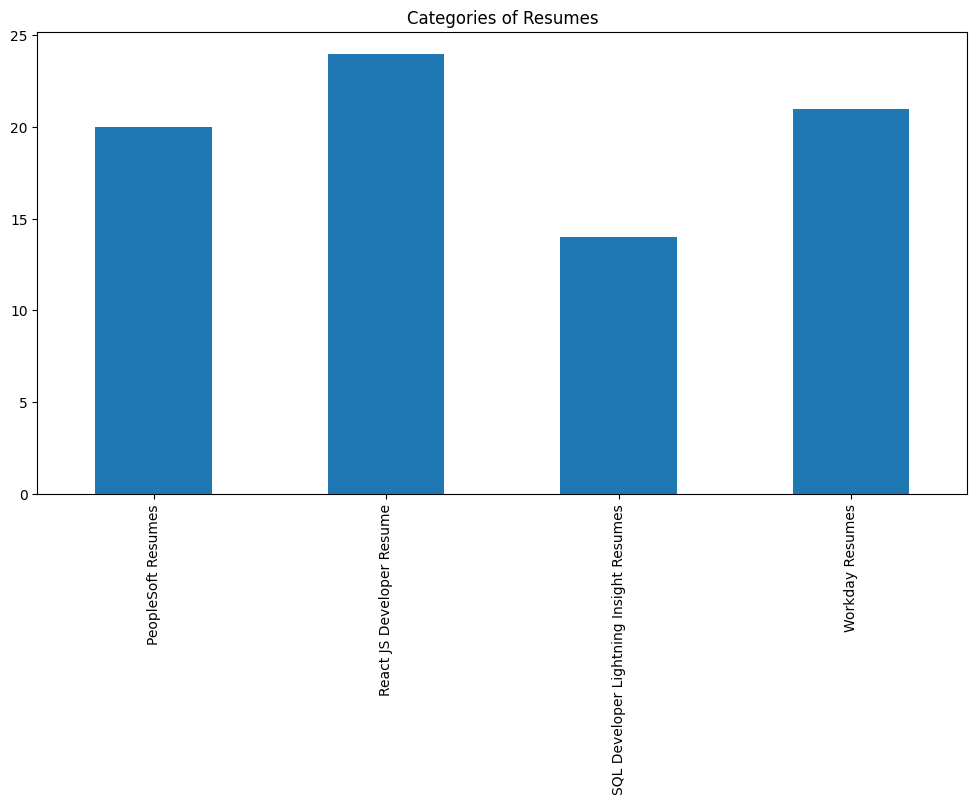

In [ ]:
resume_df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Categories of Resumes')
plt.show()

In [ ]:
def wordcloud(df):
    txt = ' '.join(txt for txt in resume_df['Tidy_Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

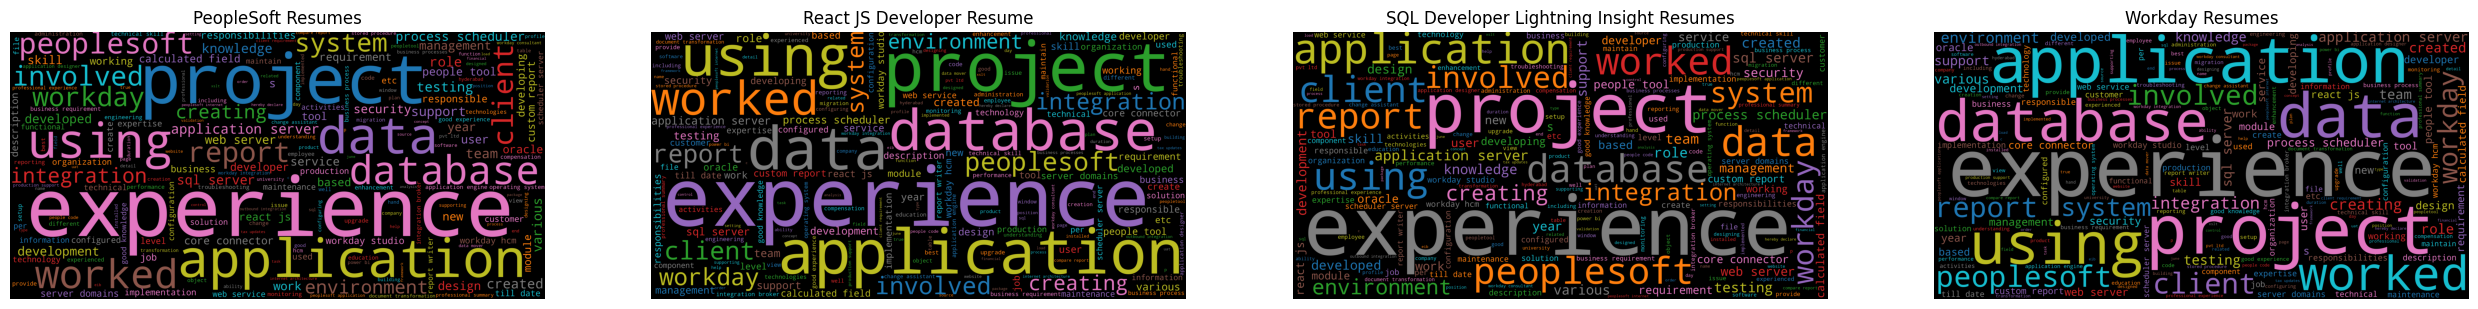

In [ ]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline
plt.figure(figsize=(40, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()
plt.show()
plt.close()

In [ ]:
#converting category column type into Response variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resume_df[i] = le.fit_transform(resume_df[i])

In [ ]:
resume_df

,Category,Tidy_Resumes
0,1,md khizaruddin rauf experience currently worki...
1,1,susovan bag seeking a challenging position in ...
2,1,name ravali p curriculum vitae specialization ...
3,1,haripriya battina experience as ui developer i...
4,1,naveen sadhu title software developer location...
...,...,...
74,3,harikrishna akula summary years of it experien...
75,3,workday integration consultant name sri krishn...
76,3,vinay kumar v workday functional consultant ex...
77,3,venkateswarlub workday consultant having years...


In [ ]:
resume_df.Category.value_counts()

1    24
3    21
0    20
2    14
Name: Category, dtype: int64

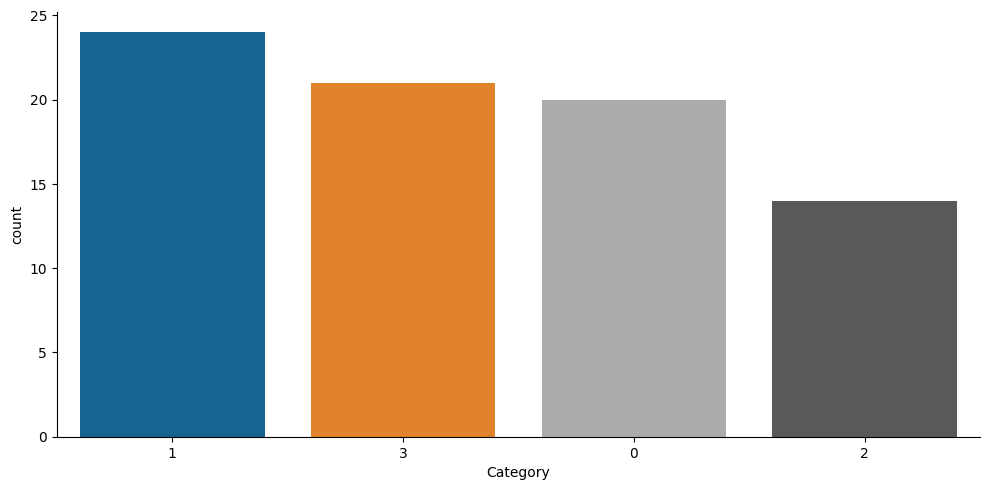

In [ ]:
# Create catplot chart
sns.catplot(x='Category', kind="count", aspect = 2, data= resume_df, order = resume_df['Category'].value_counts().index)

In [ ]:
targetCounts = resume_df['Category'].value_counts().reset_index()['Category']
targetLabels  = resume_df['Category'].value_counts().reset_index()['index']

In [ ]:
targetCounts

0    24
1    21
2    20
3    14
Name: Category, dtype: int64

In [ ]:
targetLabels

0    1
1    3
2    0
3    2
Name: index, dtype: int64

**Applying TF-IDF Vectorizer**

In [ ]:
requiredText = resume_df['Tidy_Resumes'].values
requiredTarget = resume_df['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vectorizer.fit(requiredText)
wordFeatures = word_vectorizer.transform(requiredText)

In [ ]:
wordFeatures

<79x4736 sparse matrix of type '<class 'numpy.float64'>'
	with 19807 stored elements in Compressed Sparse Row format>

In [ ]:
requiredTarget

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

### **Model Building**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(wordFeatures, requiredTarget, random_state=30, test_size=20,stratify=requiredTarget)
X_train.shape,Y_train.shape, X_test.shape,Y_test.shape

((59, 4736), (59,), (20, 4736), (20,))

In [ ]:
! pip install xgboost
! pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### **Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
# Create a based model
lr = LogisticRegression()
param_grid_lr = {'penalty':['l1','l2'],
                  'C':np.logspace(-4,2,30),
                 'max_iter':[100,200,300,400]}

grid_search_lr = GridSearchCV(estimator=lr,param_grid = param_grid_lr,cv= 10,scoring='accuracy',n_jobs=-1)
grid_search_lr.fit(X_train,Y_train)

lr_params = grid_search_lr.best_params_
print(lr_params)

{'C': 3.562247890262444, 'max_iter': 100, 'penalty': 'l2'}


In [ ]:
lr_model = LogisticRegression(**lr_params)
lr_model.fit(X_train,Y_train)

LogisticRegression(C=3.562247890262444)

In [ ]:
y_pred_lr = lr_model.predict(X_test)

In [ ]:
y_train_lr = lr_model.predict(X_train)

In [ ]:
train_lr_acc = accuracy_score(Y_train, y_train_lr) * 100
print("Training Accuracy =", train_lr_acc)

lr_acc = accuracy_score(Y_test, y_pred_lr) * 100
print("Testing Accuracy =", lr_acc)

Training Accuracy = 100.0
Testing Accuracy = 90.0


In [ ]:
cm=confusion_matrix(Y_test, y_pred_lr)

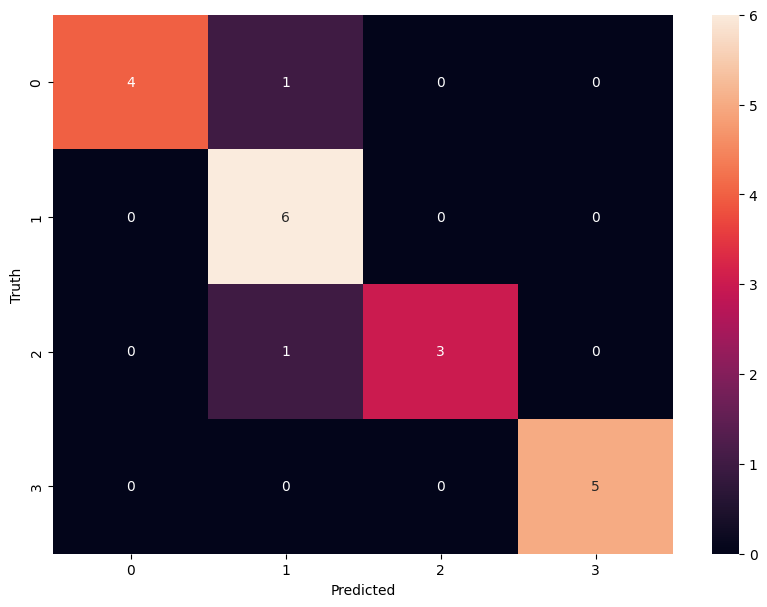

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.75      1.00      0.86         6
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         5

    accuracy                           0.90        20
   macro avg       0.94      0.89      0.90        20
weighted avg       0.93      0.90      0.90        20



**Checking for overfitting and underfitting**

In [ ]:
# Checking for overfitting and underfitting

print('Training Accuracy: {:.4f}'.format(lr_model.score(X_train, Y_train)))
print('Testing Accuracy: {:.4f}'.format(lr_model.score(X_test, Y_test)))

Training Accuracy: 1.0000
Testing Accuracy: 0.9000


### **Support Vector Machine Classifier (SVC)**

In [ ]:
svc = SVC()
param_grid_svc = {'kernel':['linear','poly','rbf', 'sigmoid'],
                  'class_weight':['balanced'],
                  'C':[0.1,0.001,0.01,1]
                 }

grid_search_svc = GridSearchCV(estimator=svc,param_grid=param_grid_svc,cv= 10,scoring='accuracy',n_jobs=-1)
grid_search_svc.fit(X_train,Y_train)

svc_params = grid_search_svc.best_params_
print(svc_params)

{'C': 1, 'class_weight': 'balanced', 'kernel': 'sigmoid'}


In [ ]:
svm_model = SVC(**svc_params)
svm_model.fit(X_train,Y_train)

SVC(C=1, class_weight='balanced', kernel='sigmoid')

In [ ]:
y_pred_svm = svm_model.predict(X_test)

In [ ]:
y_train_svm = svm_model.predict(X_train)

In [ ]:
train_svm_acc = accuracy_score(Y_train, y_train_svm) * 100
print("Training Accuracy =", train_svm_acc)

svm_acc = accuracy_score(Y_test, y_pred_svm) * 100
print("Testing Accuracy =", svm_acc)

Training Accuracy = 100.0
Testing Accuracy = 95.0


In [ ]:
cm=confusion_matrix(Y_test, y_pred_svm)

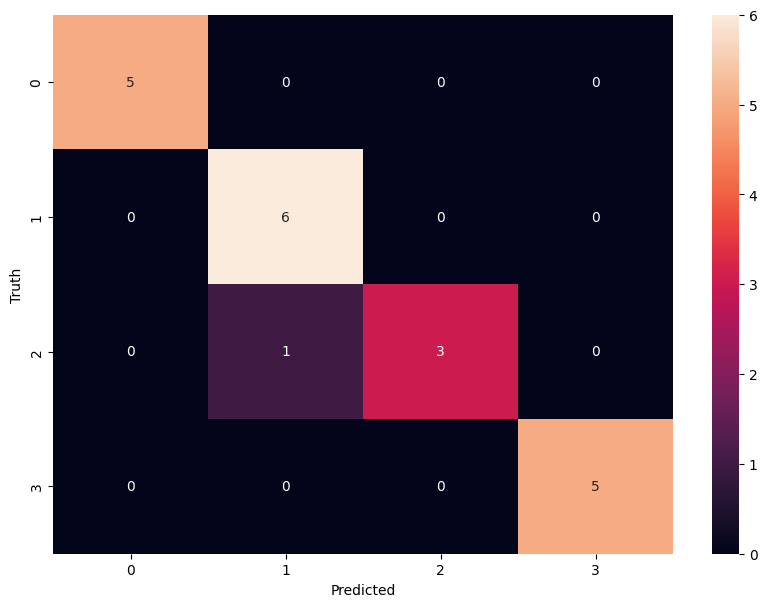

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.86      1.00      0.92         6
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         5

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.96      0.95      0.95        20



**Checking for overfitting and underfitting**

In [ ]:
# Checking for overfitting and underfitting

print('Training Accuracy: {:.4f}'.format(svm_model.score(X_train, Y_train)))
print('Testing Accuracy: {:.4f}'.format(svm_model.score(X_test, Y_test)))

Training Accuracy: 1.0000
Testing Accuracy: 0.9500


### **Random Forest Classifier**

In [ ]:
rf =  RandomForestClassifier()
param_grid_ran = {
    'criterion':['gini','entropy'],
    'max_leaf_nodes':[50,60,70],
    'max_depth':[5,10,15],
    'max_features':['auto','log2']
}

grid_search_ran = GridSearchCV(estimator=rf,param_grid=param_grid_ran,cv=10,scoring='accuracy')
grid_search_ran.fit(X_train,Y_train)

ran_params = grid_search_ran.best_params_
print(ran_params)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 50}


In [ ]:
rf_model = RandomForestClassifier(**ran_params)
rf_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, max_features='auto', max_leaf_nodes=50)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
y_train_rf = rf_model.predict(X_train)

In [ ]:
train_rf_acc = accuracy_score(Y_train, y_train_rf) * 100
print("Training Accuracy =", train_rf_acc)

rf_acc = accuracy_score(Y_test, y_pred_rf) * 100
print("Testing Accuracy =", rf_acc)

Training Accuracy = 100.0
Testing Accuracy = 95.0


In [ ]:
cm=confusion_matrix(Y_test, y_pred_rf)

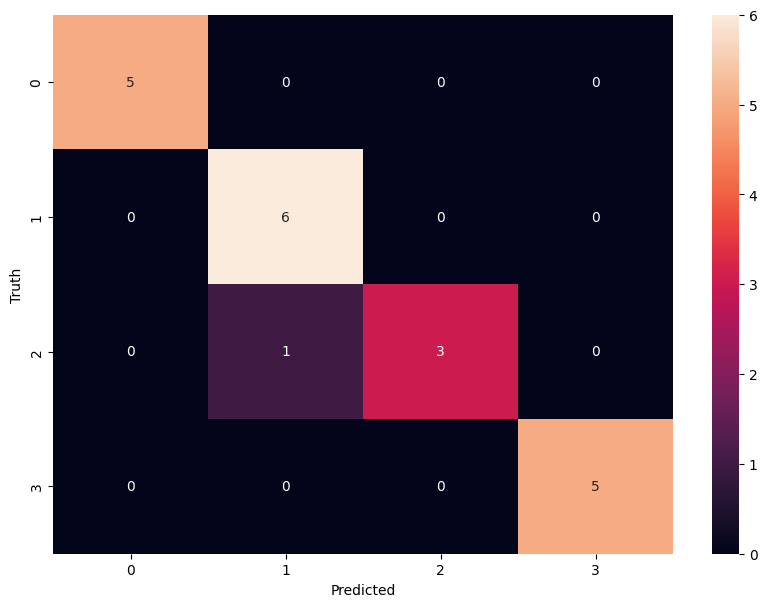

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.86      1.00      0.92         6
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         5

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.96      0.95      0.95        20



**Checking for overfitting and underfitting**

In [ ]:
# Checking for overfitting and underfitting

print('Training Accuracy: {:.4f}'.format(rf_model.score(X_train, Y_train)))
print('Testing Accuracy: {:.4f}'.format(rf_model.score(X_test, Y_test)))

Training Accuracy: 1.0000
Testing Accuracy: 0.9500


### **Naive-Bayes Classifier**

In [ ]:
nb_model=MultinomialNB()
nb_model.fit(X_train,Y_train)

MultinomialNB()

In [ ]:
y_pred_nb = nb_model.predict(X_test)

In [ ]:
y_train_nb = nb_model.predict(X_train)

In [ ]:
train_nb_acc = accuracy_score(Y_train, y_train_nb) * 100
print("Training Accuracy =", train_nb_acc)

nb_acc = accuracy_score(Y_test, y_pred_nb) * 100
print("Testing Accuracy =", nb_acc)

Training Accuracy = 100.0
Testing Accuracy = 90.0


In [ ]:
cm=confusion_matrix(Y_test, y_pred_nb)

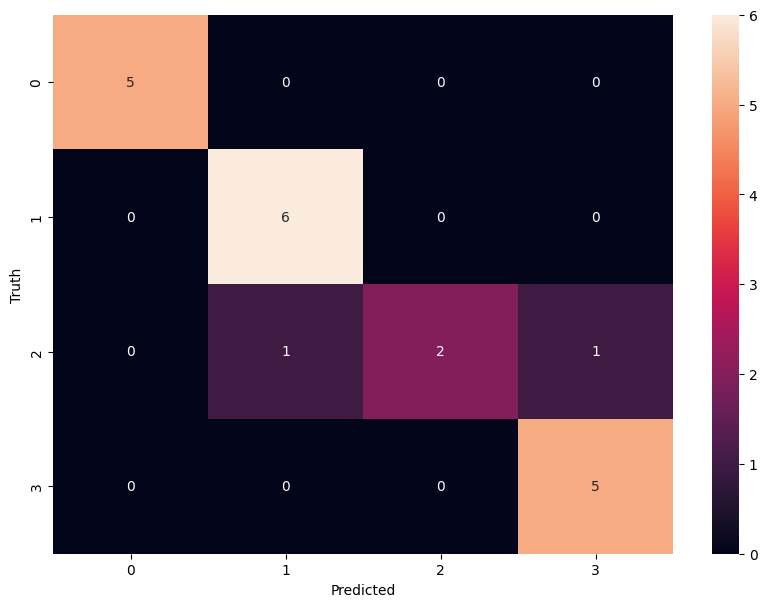

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.86      1.00      0.92         6
           2       1.00      0.50      0.67         4
           3       0.83      1.00      0.91         5

    accuracy                           0.90        20
   macro avg       0.92      0.88      0.87        20
weighted avg       0.92      0.90      0.89        20



**Checking for overfitting and underfitting**

In [ ]:
# Checking for overfitting and underfitting

print('Training Accuracy: {:.4f}'.format(nb_model.score(X_train, Y_train)))
print('Testing Accuracy: {:.4f}'.format(nb_model.score(X_test, Y_test)))

Training Accuracy: 1.0000
Testing Accuracy: 0.9000


### **Decision Tree Classifier**

In [ ]:
dc = DecisionTreeClassifier()
param_grid_des =  {'max_depth': [5,10,15,20],
                   'min_samples_split': [2, 5, 10, 15],
                   'min_samples_leaf': [1, 2, 4]}
grid_search_des = GridSearchCV(estimator = dc,param_grid = param_grid_des, cv = 5,scoring ='accuracy',n_jobs=-1)
grid_search_des.fit(X_train,Y_train)

des_params = grid_search_des.best_params_
print(des_params)

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 15}


In [ ]:
dc_model = DecisionTreeClassifier(**des_params)
dc_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=15)

In [ ]:
y_pred_dc = dc_model.predict(X_test)

In [ ]:
y_train_dc = dc_model.predict(X_train)

In [ ]:
train_dc_acc = accuracy_score(Y_train, y_train_dc) * 100
print("Training Accuracy =", train_dc_acc)

dc_acc = accuracy_score(Y_test, y_pred_dc) * 100
print("Testing Accuracy =", dc_acc)

Training Accuracy = 100.0
Testing Accuracy = 100.0


In [ ]:
cm=confusion_matrix(Y_test, y_pred_dc)

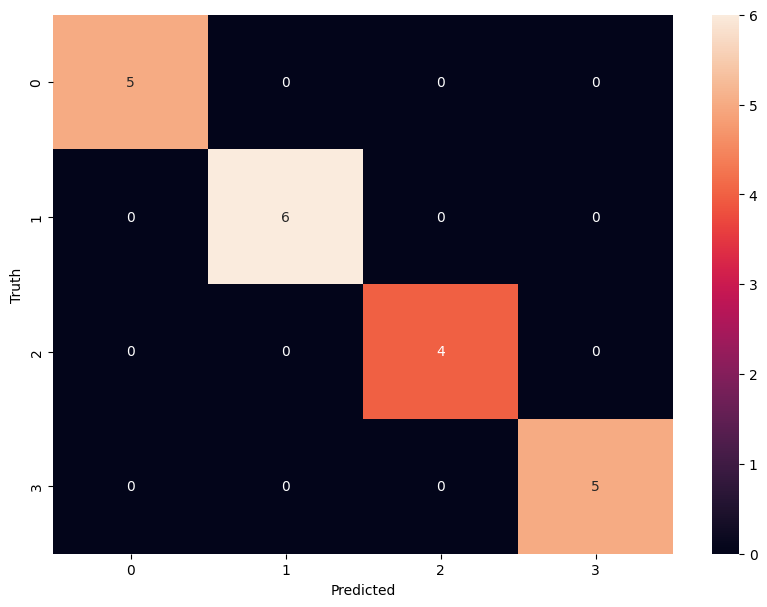

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred_dc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



**Checking for overfitting and underfitting**

In [ ]:
# Checking for overfitting and underfitting

print('Training Accuracy: {:.4f}'.format(dc_model.score(X_train, Y_train)))
print('Testing Accuracy: {:.4f}'.format(dc_model.score(X_test, Y_test)))

Training Accuracy: 1.0000
Testing Accuracy: 1.0000


### **Gradient Boosting Classifier**

In [ ]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,Y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gb = gb_model.predict(X_test)

In [ ]:
y_train_gb = gb_model.predict(X_train)

In [ ]:
train_gb_acc = accuracy_score(Y_train, y_train_gb) * 100
print("Training Accuracy =", train_gb_acc)

gb_acc = accuracy_score(Y_test, y_pred_gb) * 100
print("Testing Accuracy =", gb_acc)

Training Accuracy = 100.0
Testing Accuracy = 100.0


In [ ]:
cm=confusion_matrix(Y_test, y_pred_gb)

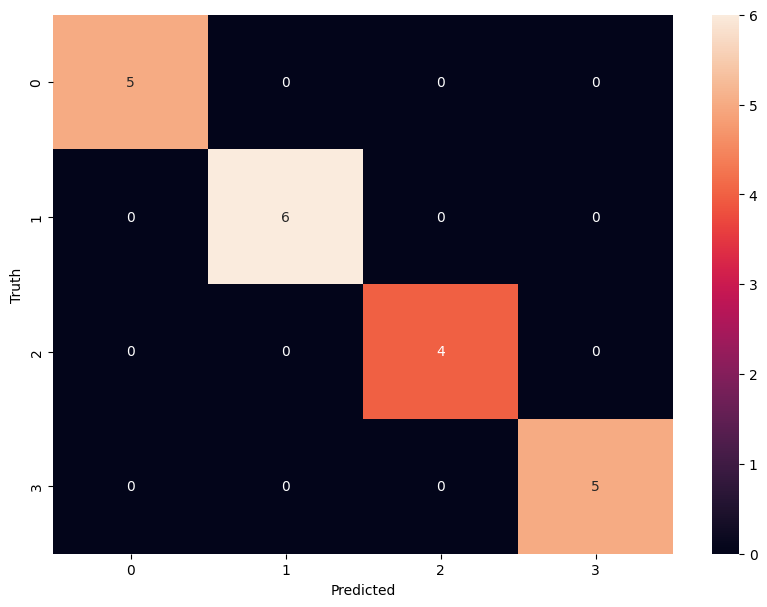

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



**Checking for overfitting and underfitting**

In [ ]:
# Checking for overfitting and underfitting

print('Training Accuracy: {:.4f}'.format(gb_model.score(X_train, Y_train)))
print('Testing Accuracy: {:.4f}'.format(gb_model.score(X_test, Y_test)))

Training Accuracy: 1.0000
Testing Accuracy: 1.0000


### **XGBoost Classifier**

In [ ]:
xgb = XGBClassifier()
param_grid_xgb = {'max_depth':[3,4,5],
                  'n_estimators':[9,10,11,12],
                  'seed':[10,20,25]}
grid_search_xgb = GridSearchCV(estimator=xgb,param_grid=param_grid_xgb,cv= 10,scoring='accuracy',n_jobs=-1)
grid_search_xgb.fit(X_train,Y_train)

xgb_params = grid_search_xgb.best_params_
print(xgb_params)

{'max_depth': 3, 'n_estimators': 9, 'seed': 10}


In [ ]:
xgb_model = XGBClassifier(**xgb_params)
xgb_model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=9, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
y_train_xgb = xgb_model.predict(X_train)

In [ ]:
train_xgb_acc = accuracy_score(Y_train, y_train_xgb) * 100
print("Training Accuracy =", train_xgb_acc)

xgb_acc = accuracy_score(Y_test, y_pred_xgb) * 100
print("Testing Accuracy =", xgb_acc)

Training Accuracy = 100.0
Testing Accuracy = 100.0


In [ ]:
cm=confusion_matrix(Y_test, y_pred_xgb)

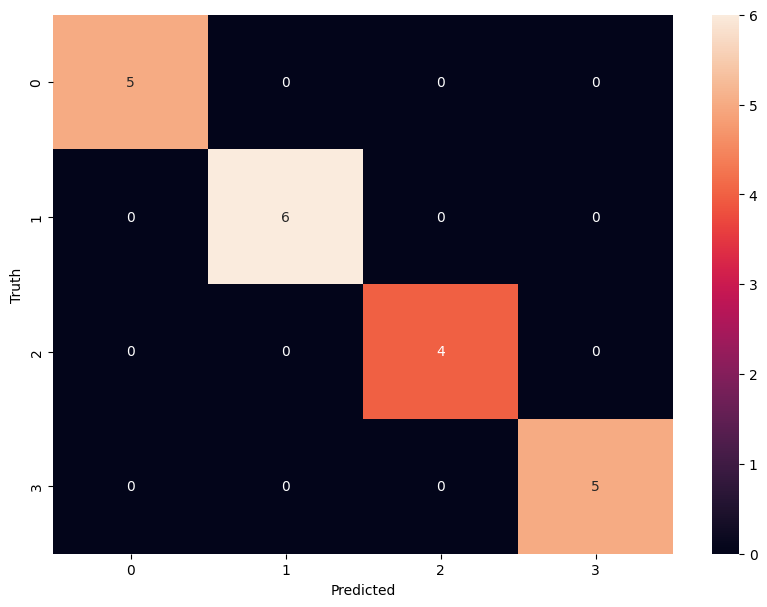

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



**Checking for overfitting and underfitting**

In [ ]:
# Checking for overfitting and underfitting

print('Training Accuracy: {:.4f}'.format(xgb_model.score(X_train, Y_train)))
print('Testing Accuracy: {:.4f}'.format(xgb_model.score(X_test, Y_test)))

Training Accuracy: 1.0000
Testing Accuracy: 1.0000


### **LGBM Classifier**

In [ ]:
lgb_model = LGBMClassifier()
lgb_model.fit(X_train,Y_train)

LGBMClassifier()

In [ ]:
y_pred_lgb = lgb_model.predict(X_test)

In [ ]:
y_train_lgb = lgb_model.predict(X_train)

In [ ]:
train_lgb_acc = accuracy_score(Y_train, y_train_lgb) * 100
print("Training Accuracy =", train_lgb_acc)

lgb_acc = accuracy_score(Y_test, y_pred_lgb) * 100
print("Testing Accuracy =", lgb_acc)

Training Accuracy = 100.0
Testing Accuracy = 95.0


In [ ]:
cm=confusion_matrix(Y_test, y_pred_lgb)

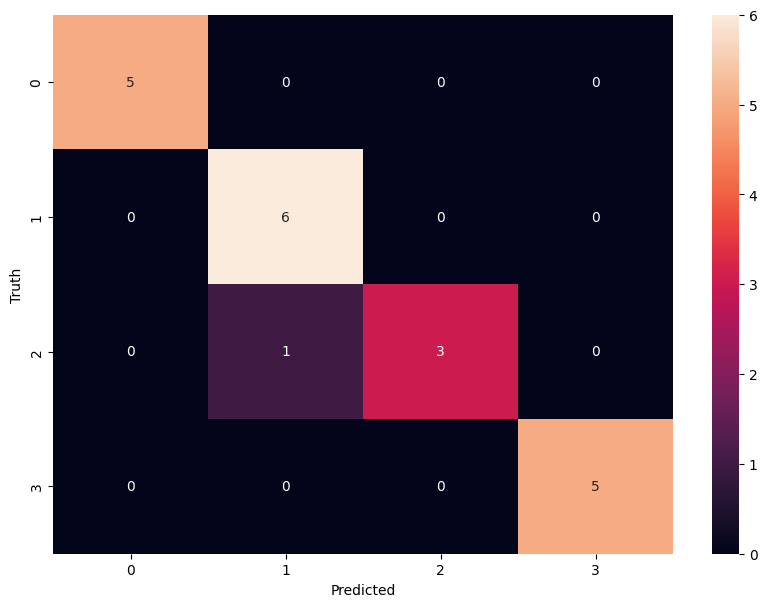

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred_lgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.86      1.00      0.92         6
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         5

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.96      0.95      0.95        20



**Checking for overfitting and underfitting**

In [ ]:
# Checking for overfitting and underfitting

print('Training Accuracy: {:.4f}'.format(lgb_model.score(X_train, Y_train)))
print('Testing Accuracy: {:.4f}'.format(lgb_model.score(X_test, Y_test)))

Training Accuracy: 1.0000
Testing Accuracy: 0.9500


## **Combining all Models**

In [ ]:
model_df = pd.DataFrame({'Models': ['Logistic Regression','SVM Classifier','Random Forest Classifier', 'Naive-Bayes Classifier',
                                   'Decision Tree Classifier', 'Gradient Boosting Classifier',
                                   'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier'],
                        'Training Accuracy':[train_lr_acc,train_svm_acc,train_rf_acc,train_nb_acc,train_dc_acc,train_gb_acc,train_xgb_acc,train_lgb_acc],
                        'Testing Accuracy':[lr_acc,svm_acc,rf_acc,nb_acc,dc_acc,gb_acc,xgb_acc,lgb_acc]})

In [ ]:
model_df.sort_values(['Testing Accuracy'],ascending=False,ignore_index=True)

,Models,Training Accuracy,Testing Accuracy
0,Decision Tree Classifier,100.0,100.0
1,Gradient Boosting Classifier,100.0,100.0
2,Xtreme Gradient Boosting Classifier,100.0,100.0
3,SVM Classifier,100.0,95.0
4,Random Forest Classifier,100.0,95.0
5,Light Gradient Boosting Classifier,100.0,95.0
6,Logistic Regression,100.0,90.0
7,Naive-Bayes Classifier,100.0,90.0


## **Model Deployment**

In [ ]:
import pickle

# Specify the path in your Google Drive where you want to save the files
svm_model_path = '/content/drive/MyDrive/Colab Notebooks/SVM_model.pkl'
rf_model_path = '/content/drive/MyDrive/Colab Notebooks/RF_model.pkl'
word_vectorizer_path = '/content/drive/MyDrive/Colab Notebooks/word_vectorizer.pkl'

# Save svm_model as a pickle file
with open(svm_model_path, 'wb') as f:
   pickle.dump(svm_model, f)

# Save svm_model as a pickle file
with open(rf_model_path, 'wb') as f:
   pickle.dump(rf_model, f)

# Save word_vectorizer as a pickle file
with open(word_vectorizer_path, 'wb') as f:
   pickle.dump(word_vectorizer, f)


# **THANK YOU**